In [26]:
#Imports and Dependencies
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Part 1 - Prepare the Data

In [2]:
#Read CSV into Pandas DataFrame
file_path = Path('myopia.csv')
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
#Remove 'MYOPIC' column from dataset
removed_df = df.drop(['MYOPIC'], axis = 'columns')
removed_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [4]:
#Checking for any null values
for column in removed_df.columns:
    print(f"Column {column} has {removed_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [9]:
#Standardize dataset so that columns that contain larger values do not 
# influence the outcome more than columns with smaller values 
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(removed_df)
print(df_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


## Part 2 - Apply Dimensionality Reduction

In [13]:
#Perform dimensionality reduction with PCA. How did the number of features change?
#Initialize PCA model
pca = PCA(n_components=6)

#Get six principal components for the iris data.
df_pca = pca.fit_transform(df_scaled)

#Transform PCA data to a DF
df_scaled_pca = pd.DataFrame(
    data=df_pca, columns=["1", "2", "3", "4", "5", "6"]
)
df_scaled_pca.head()

,1,2,3,4,5,6
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956


In [14]:
#Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878])

In [18]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#Run t-SNE on the principal components, which is the output of the PCA transformation.

#Initialize t-SNE model
tsne = TSNE(learning_rate=35)

#Reduce dimensions
tsne_features = tsne.fit_transform(df_scaled_pca)

tsne_features.shape

/Users/brittanieocampo/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

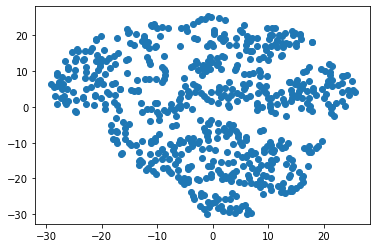

In [25]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters? 'No distinct clusters'

#First column of transformed features
df_scaled_pca['x'] = tsne_features[:,0]

#Second column of transformed features 
df_scaled_pca['y'] = tsne_features[:,1]

#Visualize the clusters
plt.scatter(df_scaled_pca['x'], df_scaled_pca['y'])
plt.show()


## Part 3 - Perform a Cluster Analysis with K-means

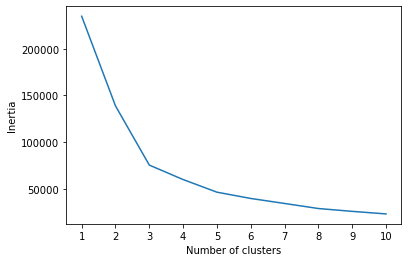

In [27]:
#Create an elbow plot to identify the best number of clusters. 
#Make sure to...Use a 'for' loop to determine the inertia for each 'k' between 1 - 10.
#Determine where the elbow of the plot is, and at which value of 'k' it appears. 
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
data = {"k": k, "inertia": inertia}
df_data = pd.DataFrame(data)

plt.plot(df_data['k'], df_data['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Part 4 - Make a Recommendation

*Can the patients be clustered? If so, into how many clusters?*

Based on the amount of data, it would be difficult to cluster patients. There are no distinct clusters made with a t-SNE model. 